In [2]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import os
import json, glob
from intrinio_api import *
%matplotlib inline

In [47]:
available_files = !ls -ltS financials/requests | awk '{if($5 > 1000) print $9}'
available_tickers = np.unique([re.match('([A-Z]+)_.*', f).group(1) for f in available_files]); available_tickers

array(['AAL', 'AAN', 'AAOI', 'AAPL', 'AAWW', 'ACIA', 'ACIW', 'ACLS',
       'ACMR', 'ACXM', 'ADBE', 'ADI', 'ADP', 'ADSK', 'AGYS', 'AL', 'ALGT',
       'ALK', 'ALRM', 'ALTR', 'AMAT', 'AMBA', 'AMBR', 'AMD', 'AMKR',
       'AMN', 'AMSWA', 'ANDV', 'ANET', 'ANSS', 'AOSL', 'APA', 'APC',
       'APPF', 'APPN', 'APTI', 'AQ', 'AR', 'ARCB', 'ARLP', 'ARRS', 'ASGN',
       'ASUR', 'ATEN', 'ATSG', 'ATU', 'ATVI', 'AVGO', 'AVID', 'AXTI',
       'AYR', 'AYX', 'AZPN', 'BAND', 'BBSI', 'BC', 'BCO', 'BCOV', 'BGSF',
       'BHE', 'BHGE', 'BKI', 'BL', 'BLKB', 'BNFT', 'BOX', 'BPL', 'BRKS',
       'BSM', 'BTU', 'BWXT', 'CA', 'CACI', 'CAI', 'CAMP', 'CARB', 'CARG',
       'CARS', 'CCMP', 'CCRN', 'CDEV', 'CDNS', 'CERN', 'CEVA', 'CHK',
       'CHRW', 'CKH', 'CLB', 'CLDR', 'CLGX', 'CLR', 'CMI', 'CMTL', 'CNX',
       'COG', 'COMM', 'COP', 'COUP', 'CP', 'CPE', 'CPSI', 'CRAY', 'CREE',
       'CRM', 'CRTO', 'CRUS', 'CSCO', 'CSGS', 'CSLT', 'CSOD', 'CSX',
       'CTS', 'CTSH', 'CTXS', 'CVG', 'CVI', 'CVLT', 'CVRR', 'CVX'

In [48]:
len(available_tickers)

494

In [3]:
tickers_df = pd.read_csv('tickers.csv')

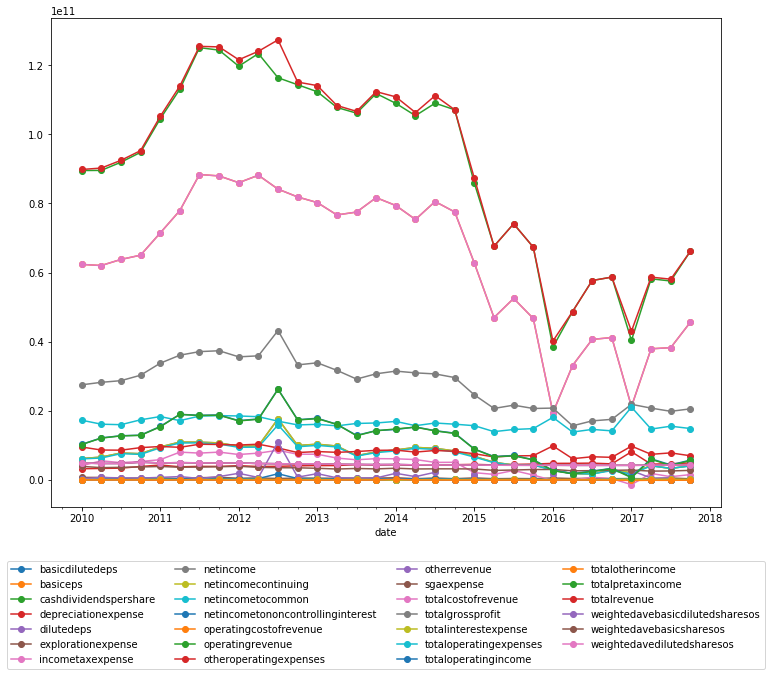

In [49]:
ticker = 'XOM'
fig,ax = plt.subplots(figsize=(12,9))
df_t = get_df(ticker)
df_t.query("statement=='income_statement'").pivot_table('value','date','tag').plot(ax=ax, marker='o')
ax.legend(loc=9, bbox_to_anchor=(.5,-.1), ncol=4)